In [1]:
from vggt_ba.utils import JsonRetrieval

path = "/home/emmanuel/Desktop/crocodl_challenge/experiments/visual_localization/outputs/retrievals/sessions_map_ios_query_ios.json"

retrieval = JsonRetrieval(path)

In [2]:
#img_repo_paths, ranks, scores = retrieval[191]
sample = retrieval.sample()
query_path = sample['query_path']
ranks = sample['retrieval']['ranks']
ref_img_paths = sample['retrieval']['ref_paths']
scores = sample['retrieval']['scores']
ref_poses = sample['retrieval']['ref_poses']

In [3]:
import os

crocodl_dataset = "/media/emmanuel/nvme_storage/datasets/crocodl_dataset"

query_abspath = os.path.join(crocodl_dataset, query_path)

ref_img_abspaths = [
    os.path.join(crocodl_dataset, path)
    for path in ref_img_paths
]

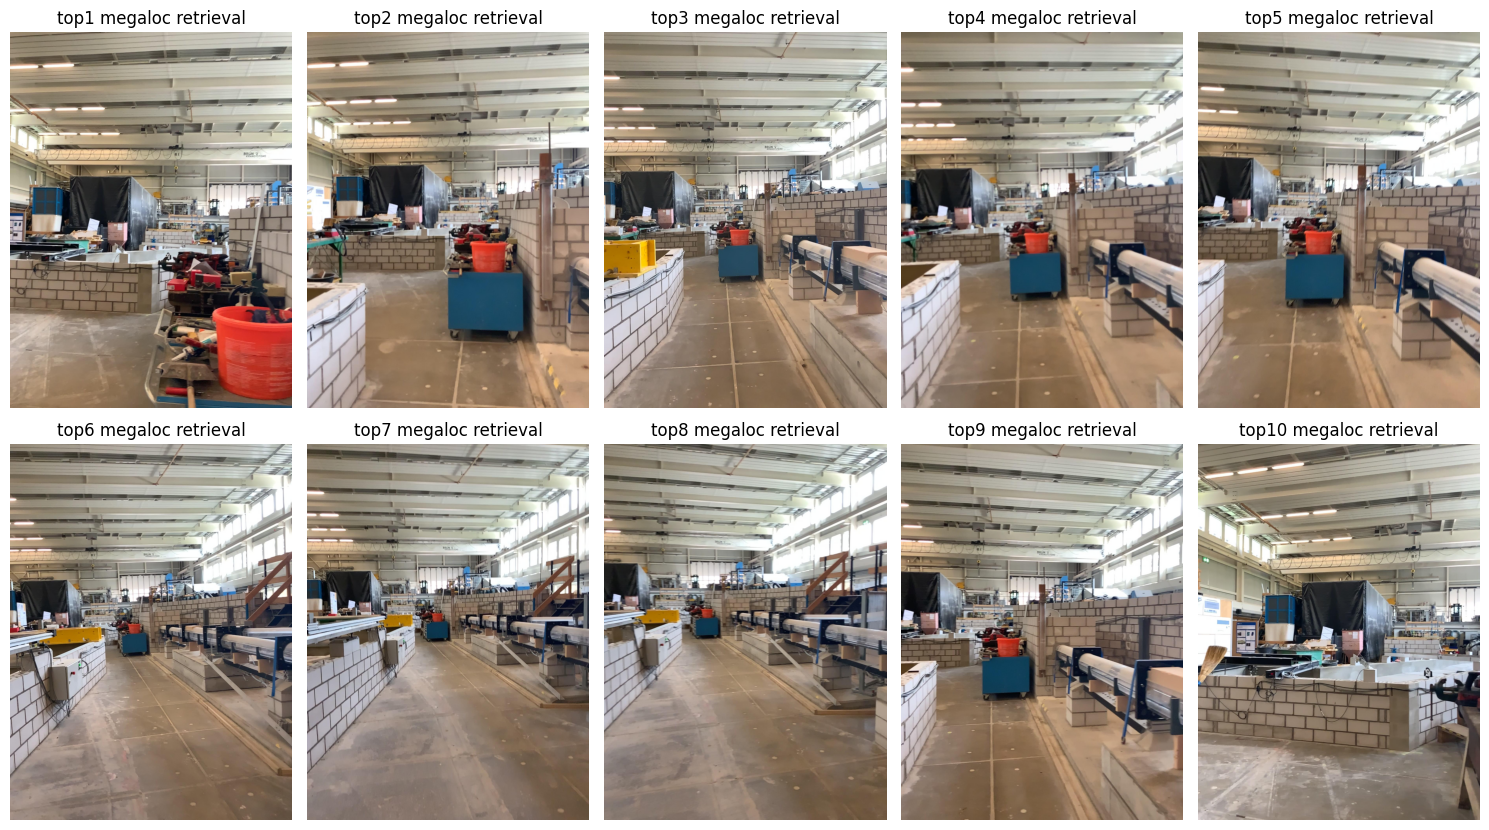

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

ref_images = [Image.open(path) for path in ref_img_abspaths]

fig, ax = plt.subplots(2, 5, figsize=(15, 9))
axis = ax.flatten()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
for i, image in enumerate(ref_images):
    ax = axis[i]
    img = np.asarray(image)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'top{i+1} megaloc retrieval')
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Query image')

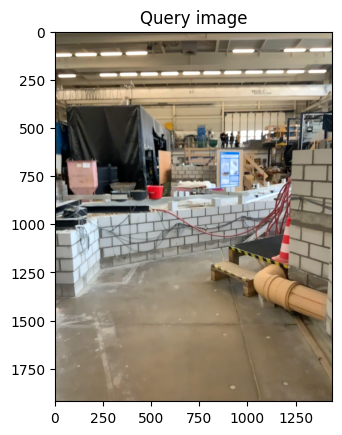

In [5]:
import matplotlib.pyplot as plt

query_img = Image.open(query_abspath)
plt.imshow(query_img)
plt.title('Query image')

In [6]:
import reranking.reranking as rrank

dump_dir = "/home/emmanuel/Desktop/crocodl_challenge/experiments/visual_localization/outputs/local_features"
features_map = rrank.DumpedFeatures(dump_dir)

In [7]:
lightglue = rrank.Matcher()

query_local_feats = features_map[query_path]

inliers_cnt = [
    lightglue.get_inliers_count(
        query_local_feats,
        features_map[ref_img_path]
    )
    for ref_img_path in ref_img_paths
]

new_ranks = sorted(range(len(inliers_cnt)), key=lambda i: inliers_cnt[i], reverse=True)

In [8]:
print(new_ranks, inliers_cnt)

[0, 9, 1, 7, 2, 4, 8, 6, 5, 3] [97, 72, 63, 52, 61, 53, 57, 65, 61, 77]


In [9]:
reranked_images = [
    ref_images[rank]
    for rank, cnt in zip(new_ranks, inliers_cnt)
]

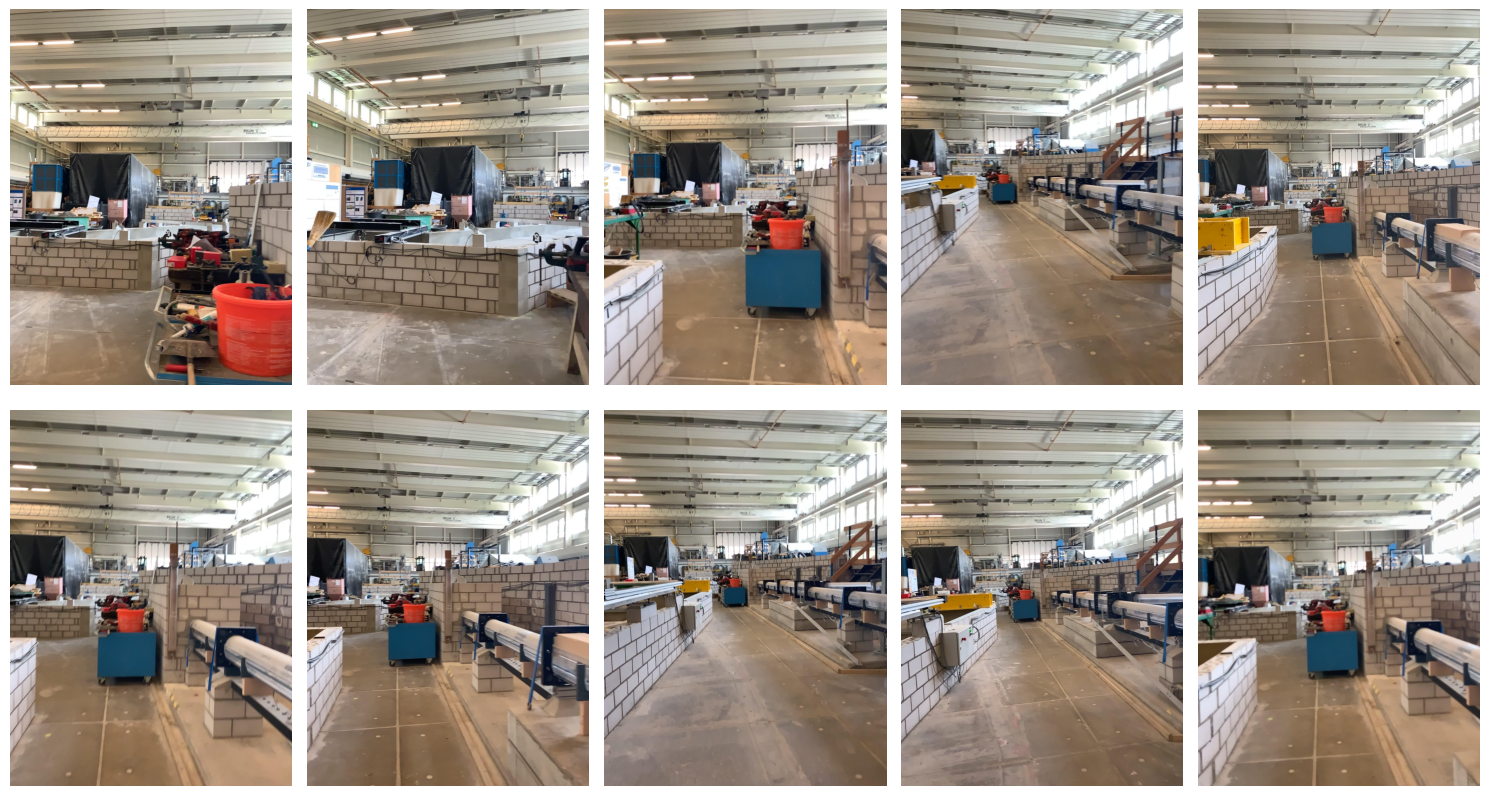

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(15, 9))
axis = ax.flatten()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
for i, image in enumerate(reranked_images):
    ax = axis[i]
    img = np.asarray(image)
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()